<a href="https://colab.research.google.com/github/RolandTapie/Data_Projects/blob/main/Data_science/Bank/Bank_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonction

In [270]:
def summary(liste,section,libelle,valeur):
  liste.append([len(liste)+1,section,libelle,valeur])
  return (liste)

def print_summary(data):
  headers = data[0]
  table_data = data[1:]
  titre="RESULTATS: analyses et Modélisation"
  titre=titre.center(100,"=")
  print("*"* len(titre))
  print(titre)
  print("*"* len(titre))
  print(tabulate(table_data, headers, tablefmt="grid"))

  table_str = titre + "\n" +tabulate(table_data, headers, tablefmt="grid")

  output_file = "/content/drive/My Drive/colab_table_a4_format.txt"

  # Write the formatted table to a .txt file
  with open(output_file, "w") as file:
      file.write(table_str)

  print(f"Table saved to {output_file}")


**Import des packages**

In [271]:
#!pip install nxviz
!pip install fpdf

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#import nxviz as nv
import missingno as msno
from itertools import combinations
from tabulate import tabulate
from google.colab import drive
import os
from fpdf import FPDF
# Mount Google Drive
drive.mount('/content/drive')


from scipy.stats import iqr, shapiro
from sklearn.metrics import mean_squared_error, r2_score,roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import qqplot
import numpy as np


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Montage du drive**

In [273]:
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


**Lecture du dataset**

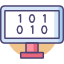

In [274]:
fraction=0.2
seed=55
file_path="https://raw.githubusercontent.com/RolandTapie/Data_Projects/refs/heads/main/Data_science/Datasets/bank_cleaned.csv"
file_path="https://raw.githubusercontent.com/RolandTapie/Data_Projects/refs/heads/main/Data_science/Datasets/titanic_data_simplified.csv"
file_path="https://raw.githubusercontent.com/RolandTapie/Data_Projects/refs/heads/main/Data_science/Datasets/Raisin_Dataset.csv"

cible="response_binary"
cible="Survived"
cible="Class"

In [275]:

df = pd.read_csv(file_path)
resume=[]
resume=summary(resume,"Section","libelle","information")
resume=summary(resume,"Dataset","Path",file_path)

In [276]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB
None


**Renommage des colonnes**

In [277]:

feat=['age', 'job', 'marital', 'education', 'default','balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign','pdays', 'previous', 'poutcome', 'response_binary']
feat=['age', 'balance','duration', 'campaign','pdays','loan']
one_hot_enconding=["job","marital","education","default","housing","loan","month","poutcome"]
one_hot_enconding=['loan']


**Définir la cible**

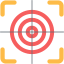

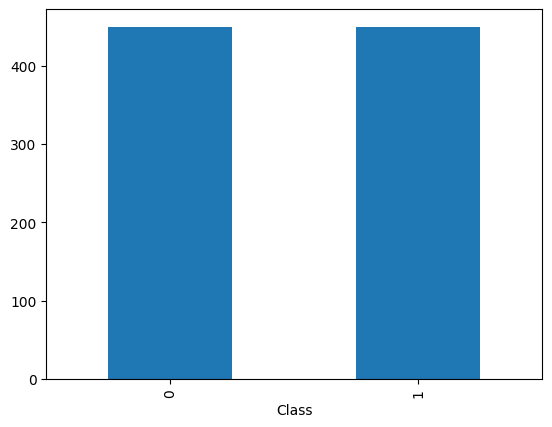

2


In [278]:
df_cible=df[cible].value_counts()
df_cible.plot(kind="bar")
plt.show()
print(len(df_cible))
if (len(df_cible)==2):
  resume=summary(resume,"Dataset","Nature cible", "Cible binaire -> Classification")
elif (len(df_cible)>2):
  resume=summary(resume,"Dataset","Nature cible", "Cible non binaire -> Régression")
else:
  resume=summary(resume,"Dataset","Nature cible", "Vérifier la cible")
  raise ValueError("Vérifier la cible")

**Description du dataset**

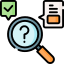

In [279]:
df.describe()
resume=summary(resume,"Dataset","taille", str(len(df)) + " observations")

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


**Traiter le type des données**

In [281]:
for col in df.columns:
  if "Unnamed" in col:
    df=df.drop(col,axis=1)
  if "Emoji" in col:
    df=df.drop(col,axis=1)

colonnes=df.columns.tolist()

print("Les champs du Dataset")
print(colonnes)
compteur=0
for col in colonnes:
  if df[col].dtype=="object":
    df[col]=df[col].astype("category")
    compteur+=1

    print(f'les données du champ {col} de type {df[col].dtype} ont été changées en type category')
    print('\n')
    print('Avec les valeurs ci-dessous:')
    print('\n')
    print(df[col].unique())
    print('\n')
resume=summary(resume,"Dataset","Nombre de champs de type object tranformés en category",compteur)

liste_cat=[col for col in df.columns if df[col].dtype=="category"]

resume=summary(resume,"Dataset","Nombre de champs de type category",compteur)
liste_float_int=[col for col in df.columns if ((df[col].dtype=="int64")|(df[col].dtype=="float64"))]

print("*"*100)
print('la liste des champs de type float ou int')
print (liste_float_int)
resume=summary(resume,"Dataset","champs de type float ou int",(liste_float_int))
print("*"*100)
print('la liste des champs de type category')
print (liste_cat)
resume=summary(resume,"Dataset","champs de type category",(liste_cat))

Les champs du Dataset
['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Class']
****************************************************************************************************
la liste des champs de type float ou int
['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter', 'Class']
****************************************************************************************************
la liste des champs de type category
[]


**Vérification des enrigistrements nulls**

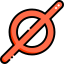

In [282]:
df.isna().any().sum()
resume=summary(resume,"Dataset","Nombre de valeurs nulles",df.isna().any().sum())

**Vérification des doublons**

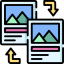

In [283]:
df.duplicated().sum()
resume=summary(resume,"Dataset","Nombre de doublons",df.duplicated().sum())

<Axes: >

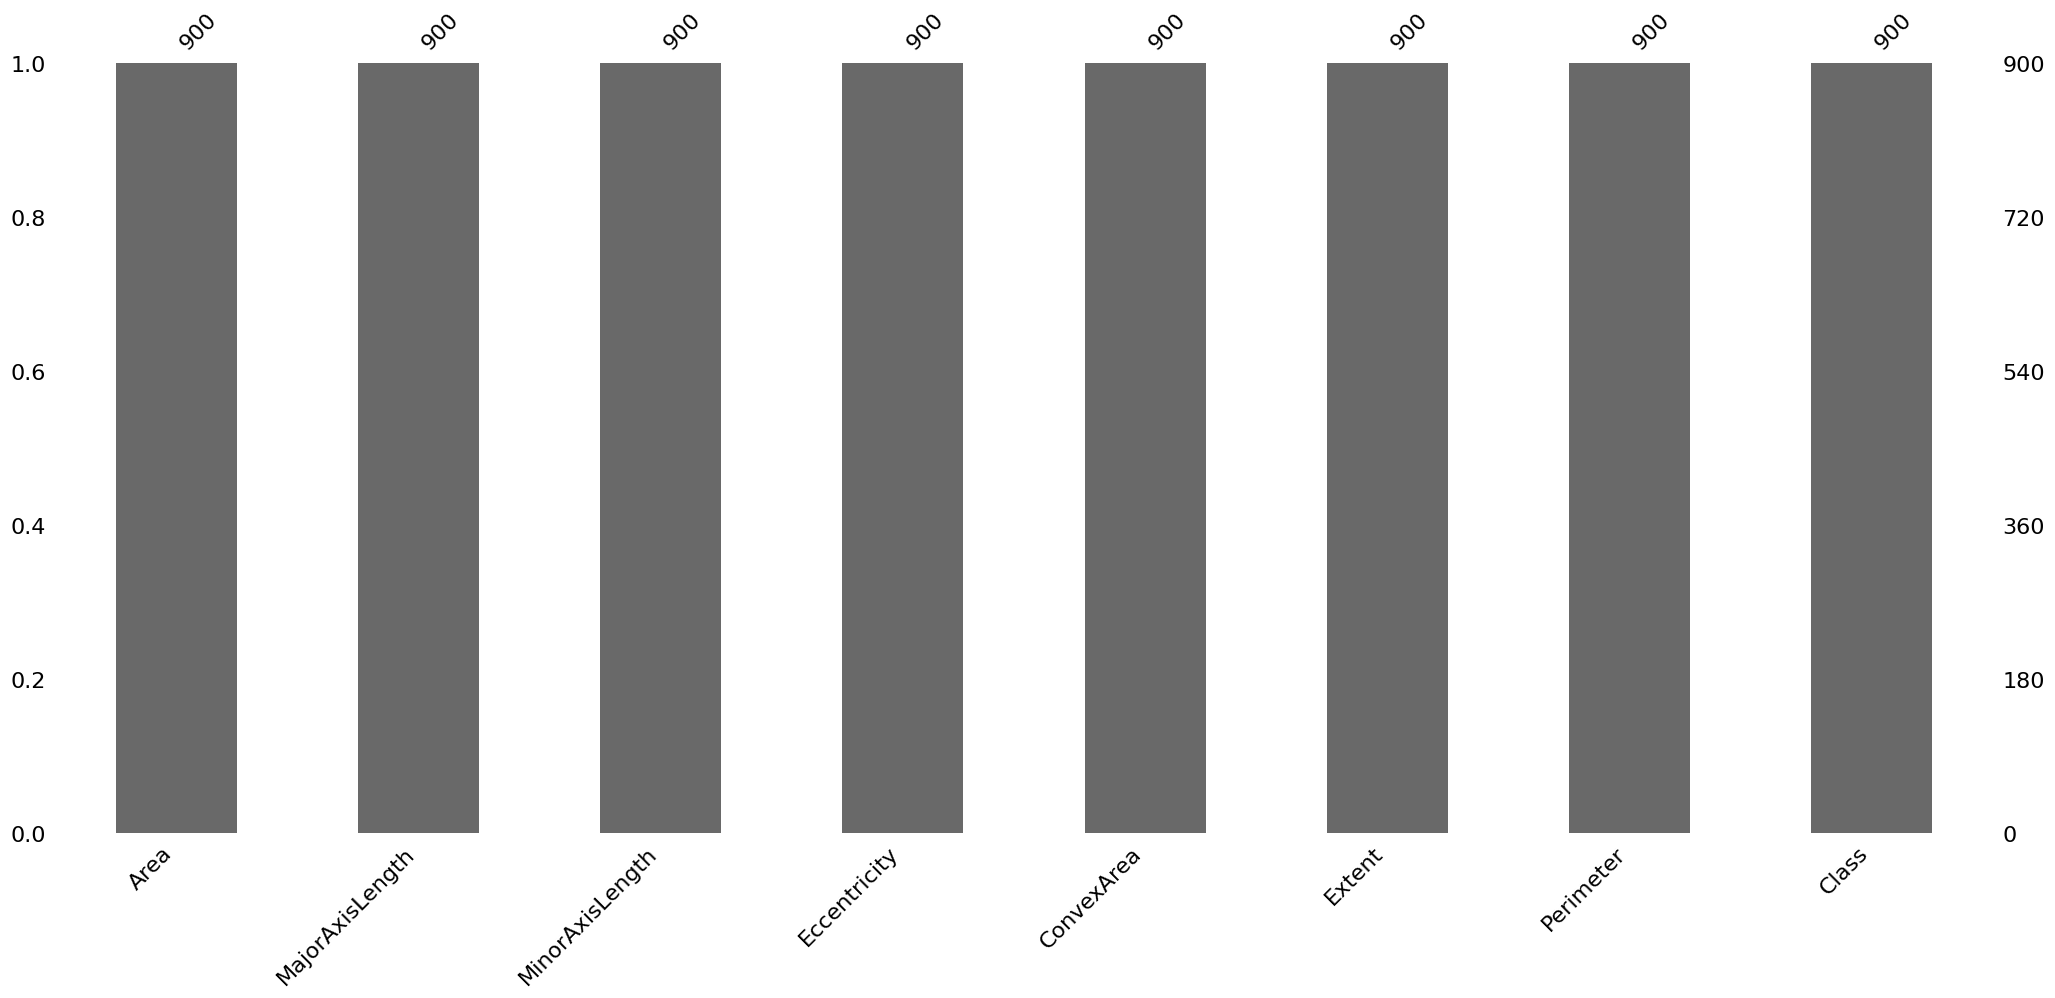

In [284]:
msno.bar(df)

<Axes: >

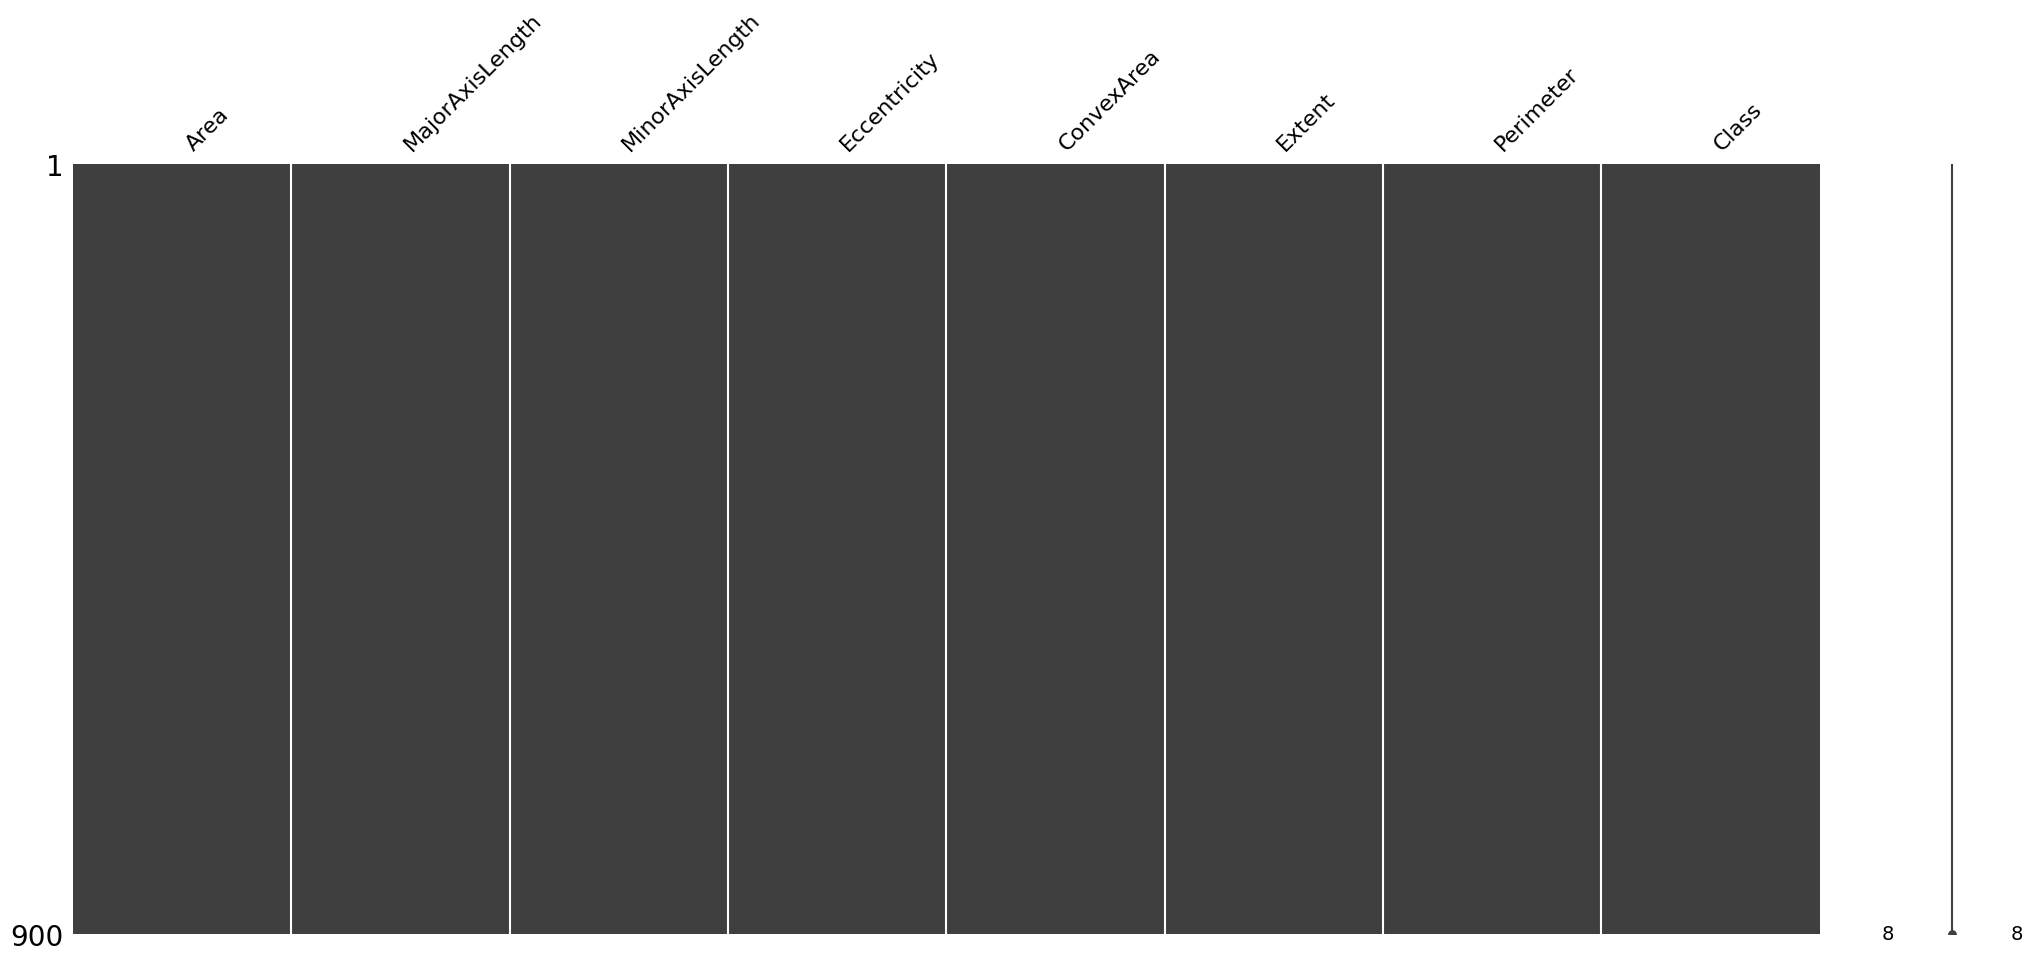

In [285]:
msno.matrix(df)


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

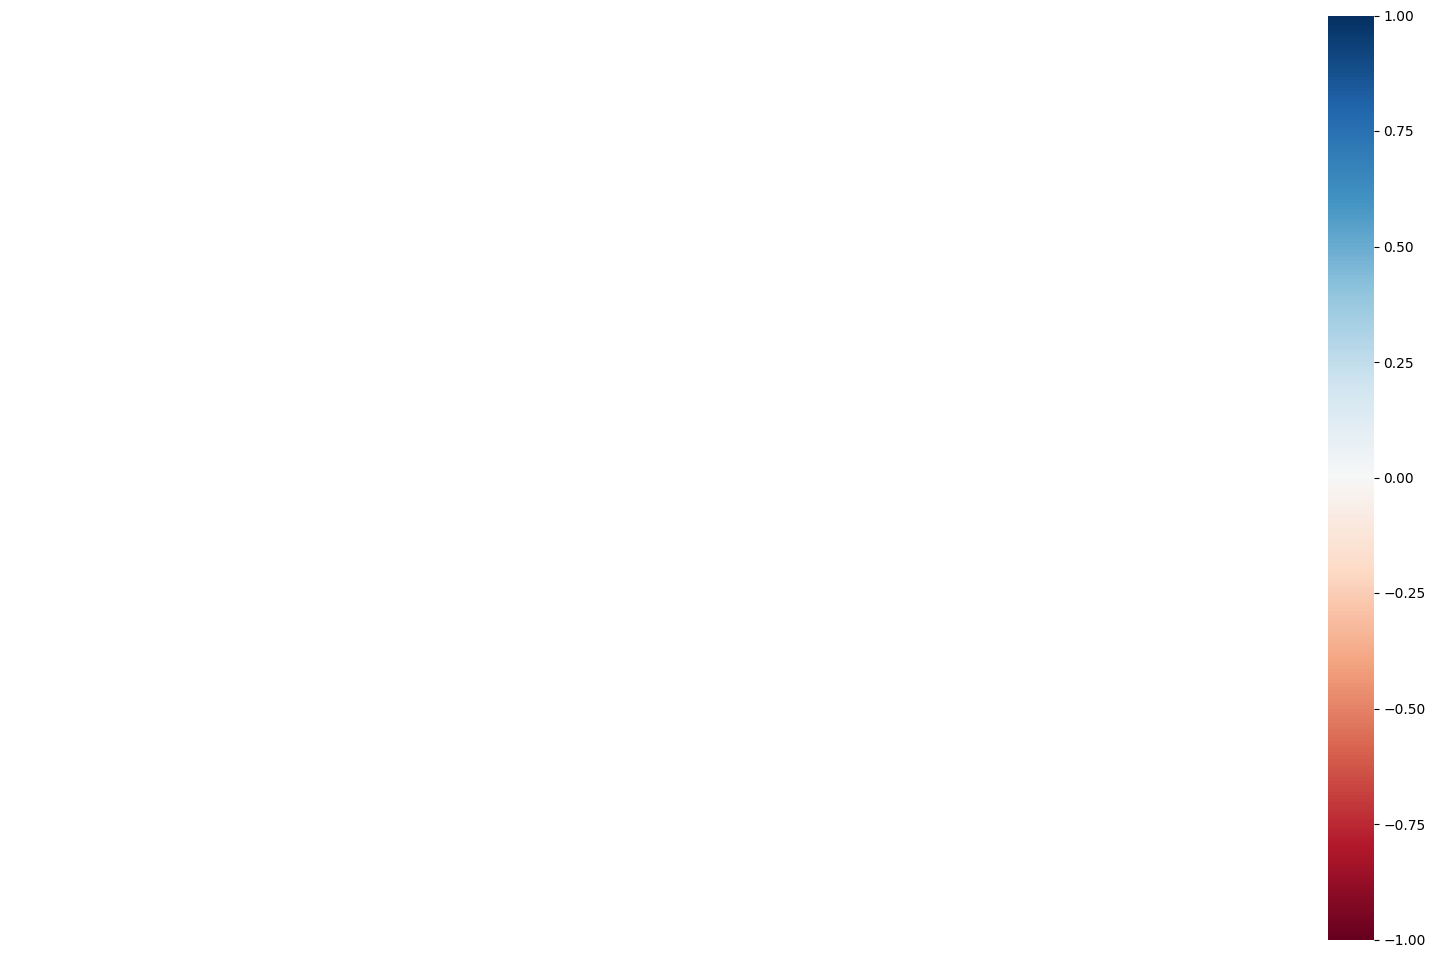

In [286]:
msno.heatmap(df)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2821: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

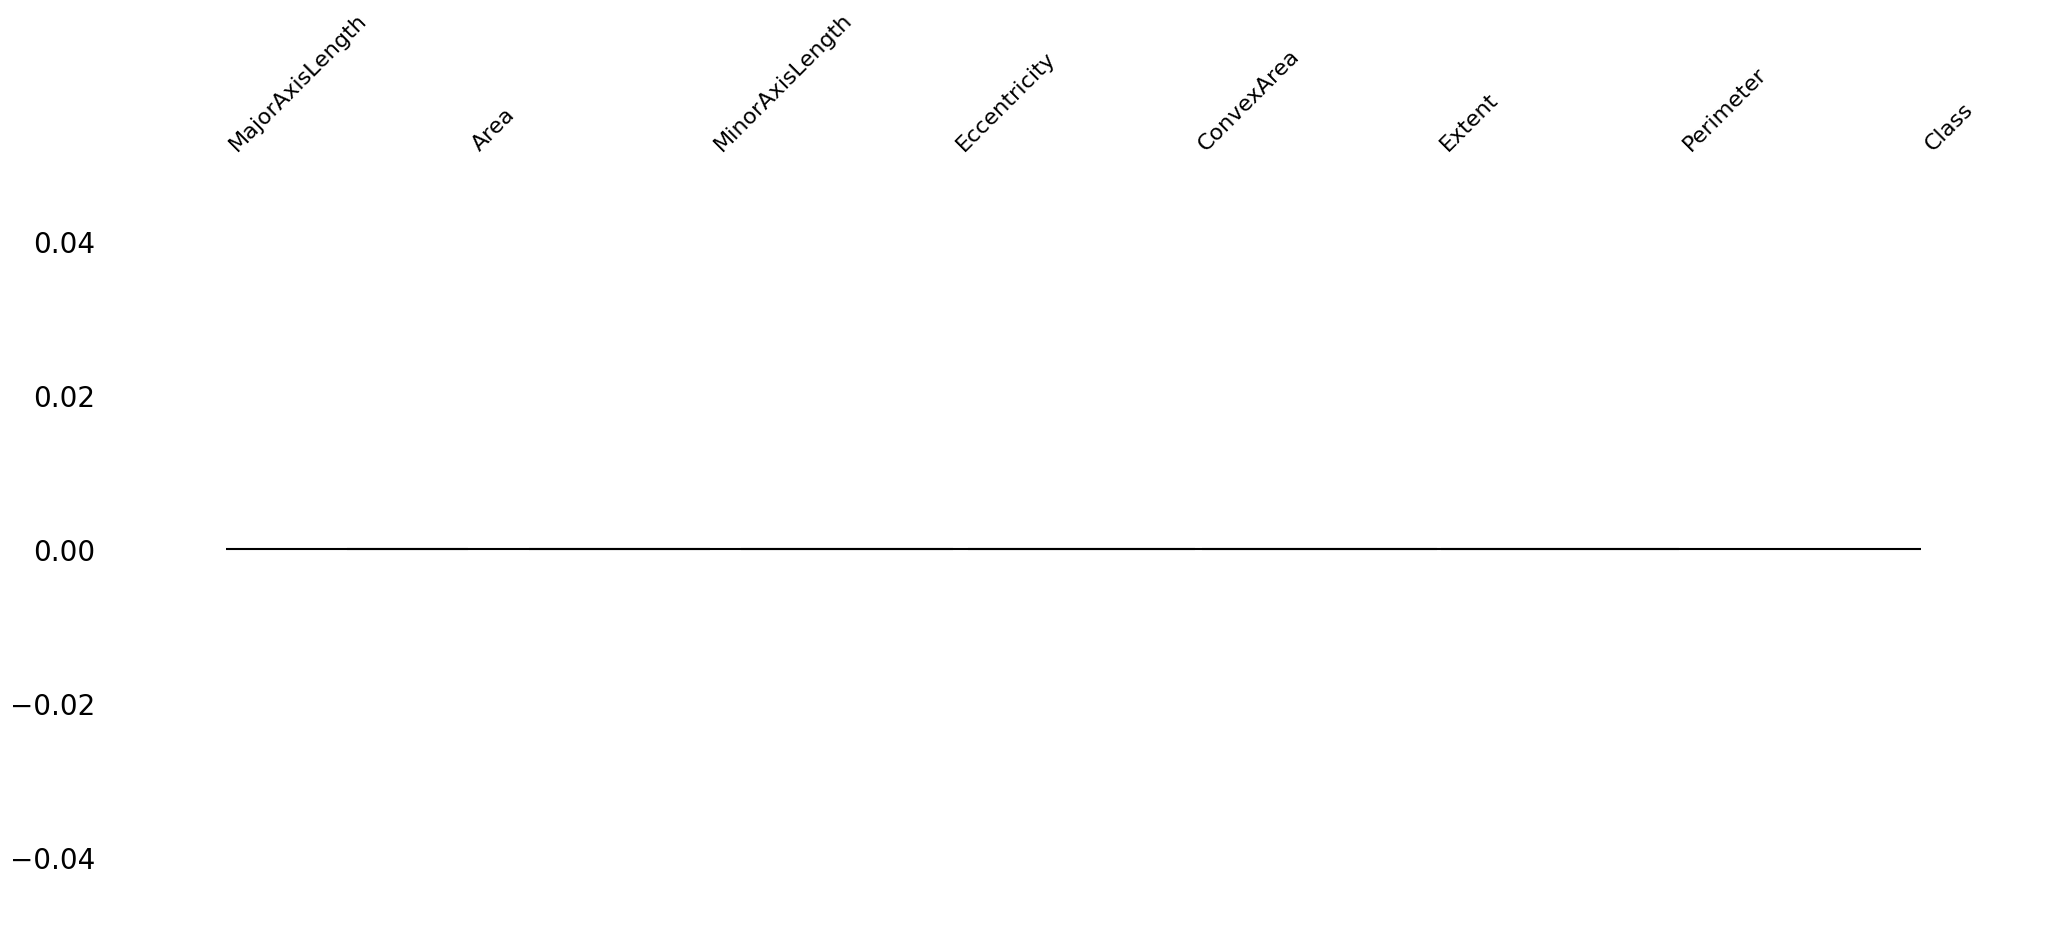

In [287]:
msno.dendrogram(df)

In [288]:
# Supprimer les lignes où toutes les valeurs sont manquantes
df= df.dropna(how='all')

# **EDA**

**Analyse des données catégorielles**

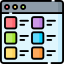

In [289]:
df_cat=df[liste_cat]
analyse=""
for col in liste_cat:
  #print(df_cat[col].value_counts(normalize=True))
  analyse=analyse+col+'\n'
  analyse=analyse+("*"*10)+'\n'
  analyse=analyse+str(df_cat[col].value_counts(normalize=True).round(2))+'\n'
  #df_cat[col].value_counts(normalize=True).plot(kind='bar')

  counts = df.groupby([col, cible]).size().reset_index(name='count')

  sns.barplot(data=counts, x=col, y='count', hue=cible)
  plt.show()
  print("*"*100)
  print(df_cat[col].value_counts(normalize=True).round(2))
resume=summary(resume,"EDA","Analyse des données catégorielles",analyse)

**Vérifications des distributions**



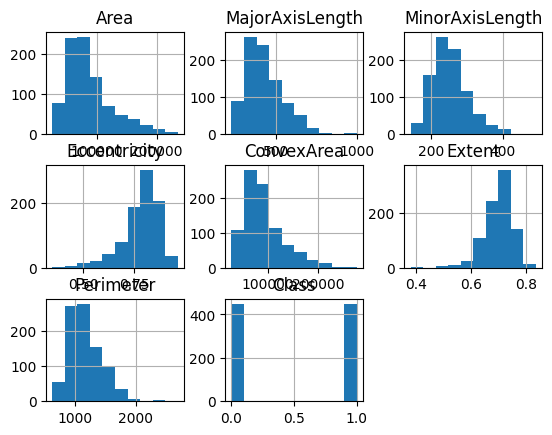

In [290]:
df_num=df[liste_float_int]
df_num.hist()
plt.show()

Test sur la normalité des données numériques

Vérification visuelle pour le champ Area
Area 0.906 0.0
Vérification visuelle pour le champ MajorAxisLength
MajorAxisLength 0.942 0.0
Vérification visuelle pour le champ MinorAxisLength
MinorAxisLength 0.965 0.0
Vérification visuelle pour le champ Eccentricity
Eccentricity 0.913 0.0
Vérification visuelle pour le champ ConvexArea
ConvexArea 0.902 0.0
Vérification visuelle pour le champ Extent
Extent 0.944 0.0
Vérification visuelle pour le champ Perimeter
Perimeter 0.945 0.0
Vérification visuelle pour le champ Class
Class 0.637 0.0


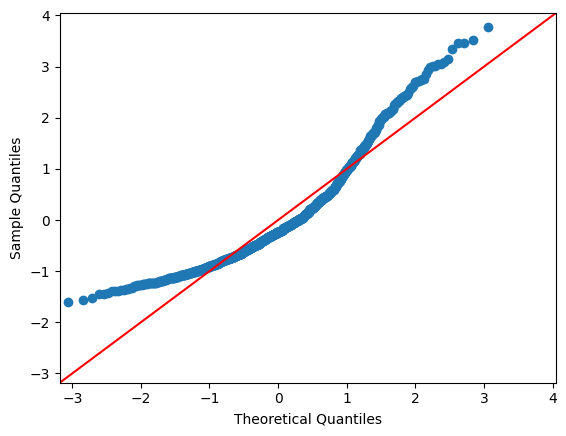

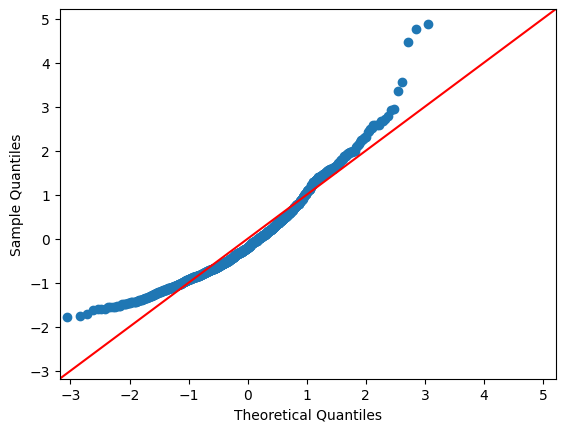

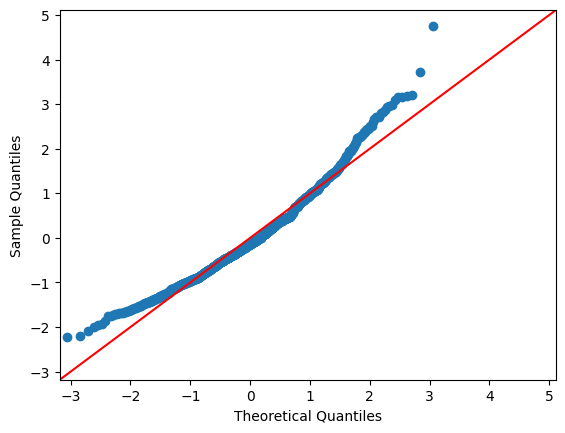

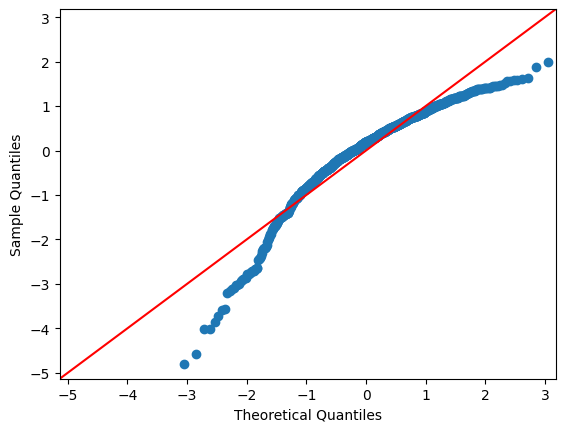

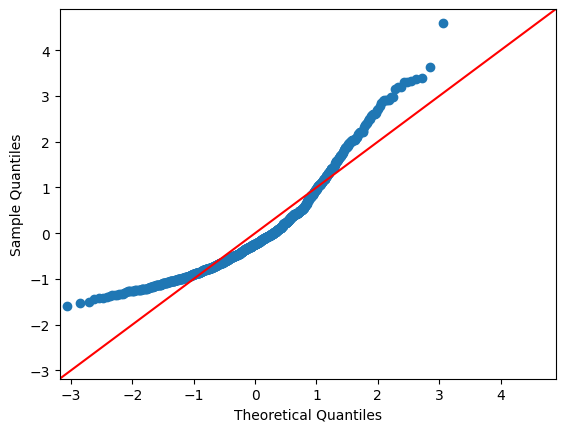

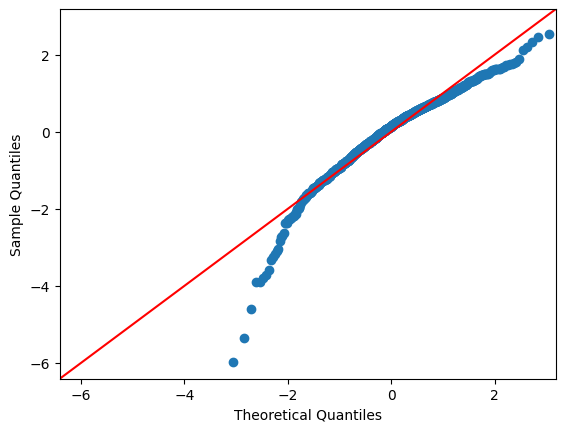

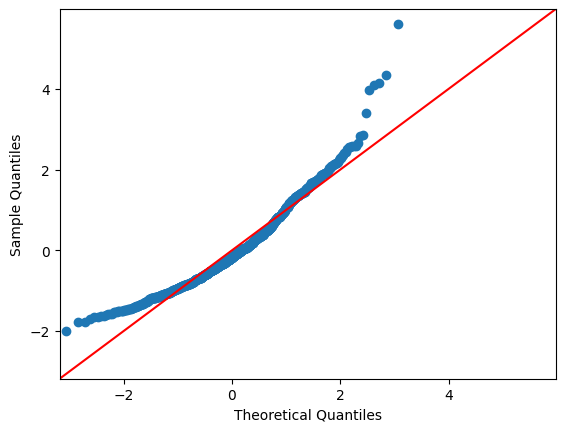

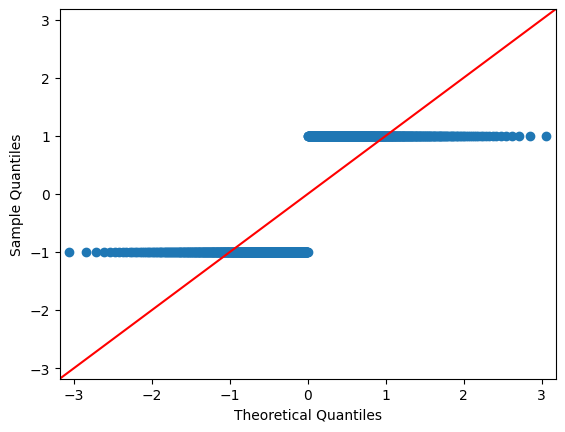

In [291]:
alpha=0.05

liste_norm=""
for col in liste_float_int:
  stats, p_value = shapiro(df[col])
  stats=round(stats,3)
  p_value=round(p_value,3)
  print(f"Vérification visuelle pour le champ {col}")
  qqplot(df[col], fit=True, line="45")
  if p_value>alpha:
    liste_norm=liste_norm+col+f" : p_value ({p_value} > alpha ({alpha})) Non rejet de H0 > les données suivent une distribution normale"+'\n'
  else:
    liste_norm=liste_norm+col+f" : p_value ({p_value} < alpha ({alpha})) Rejet de H0 > les données ne suivent pas une distribution normale"+'\n'
  print(col,stats, p_value)

resume=summary(resume,"EDA","Distribution normale des données (Test de Shapiro Wilk)",f"Mise en place des hypothèses (alpha) = {(alpha)}:" +"\n" \
               + "H0 > (les données suivent une distribution normale)" +"\n"+ "H1 > (les données ne suivent pas une distribution normale) \n"\
               +"\n"\
               + liste_norm)

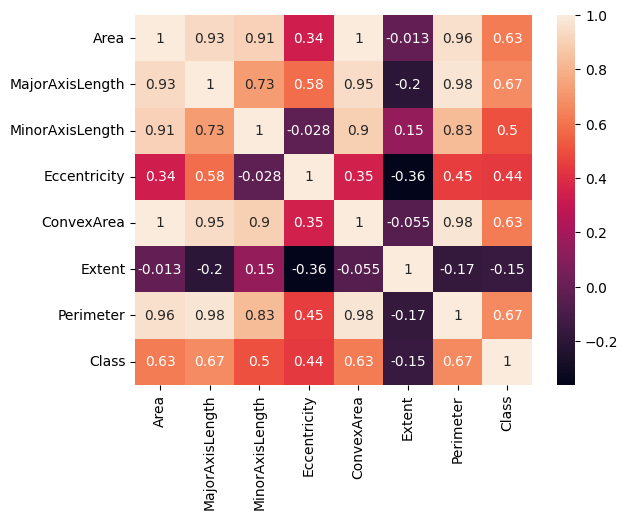

****************************************************************************************************
Liste des corrélations à analyser
****************************************************************************************************
Area > MajorAxisLength : 0.933
Area > MinorAxisLength : 0.907
Area > ConvexArea : 0.996
Area > Perimeter : 0.961
Area > Class : 0.626
MajorAxisLength > MinorAxisLength : 0.728
MajorAxisLength > Eccentricity : 0.584
MajorAxisLength > ConvexArea : 0.945
MajorAxisLength > Perimeter : 0.978
MajorAxisLength > Class : 0.673
MinorAxisLength > ConvexArea : 0.896
MinorAxisLength > Perimeter : 0.827
MinorAxisLength > Class : 0.503
Eccentricity > Perimeter : 0.448
Eccentricity > Class : 0.438
ConvexArea > Perimeter : 0.977
ConvexArea > Class : 0.626
Perimeter > Class : 0.666


In [292]:
df_corr=df_num.corr()
sns.heatmap(df_corr,annot=True)
plt.show()
corr_limit=0.4
liste=[]
corr_check=[]
liste_corr=""
for i in range(len(df_corr)):
  for j in range(len(df_corr)):
    if (abs(df_corr.iloc[i,j])>=corr_limit)&(i<j):
        corr_check.append((str(df_corr.columns[i])+ " > " + str(df_corr.columns[j])+ " : " + str(round(df_corr.iloc[i,j],3))))
        liste_corr=liste_corr+str(df_corr.columns[i])+ " > " + str(df_corr.columns[j])+ " : " + str(round(df_corr.iloc[i,j],3))+'\n'
print("*"*100)
print("Liste des corrélations à analyser")
print("*"*100)
for cor in corr_check:
  print(cor)

resume=summary(resume,"EDA","corrélations à analyser",(liste_corr))

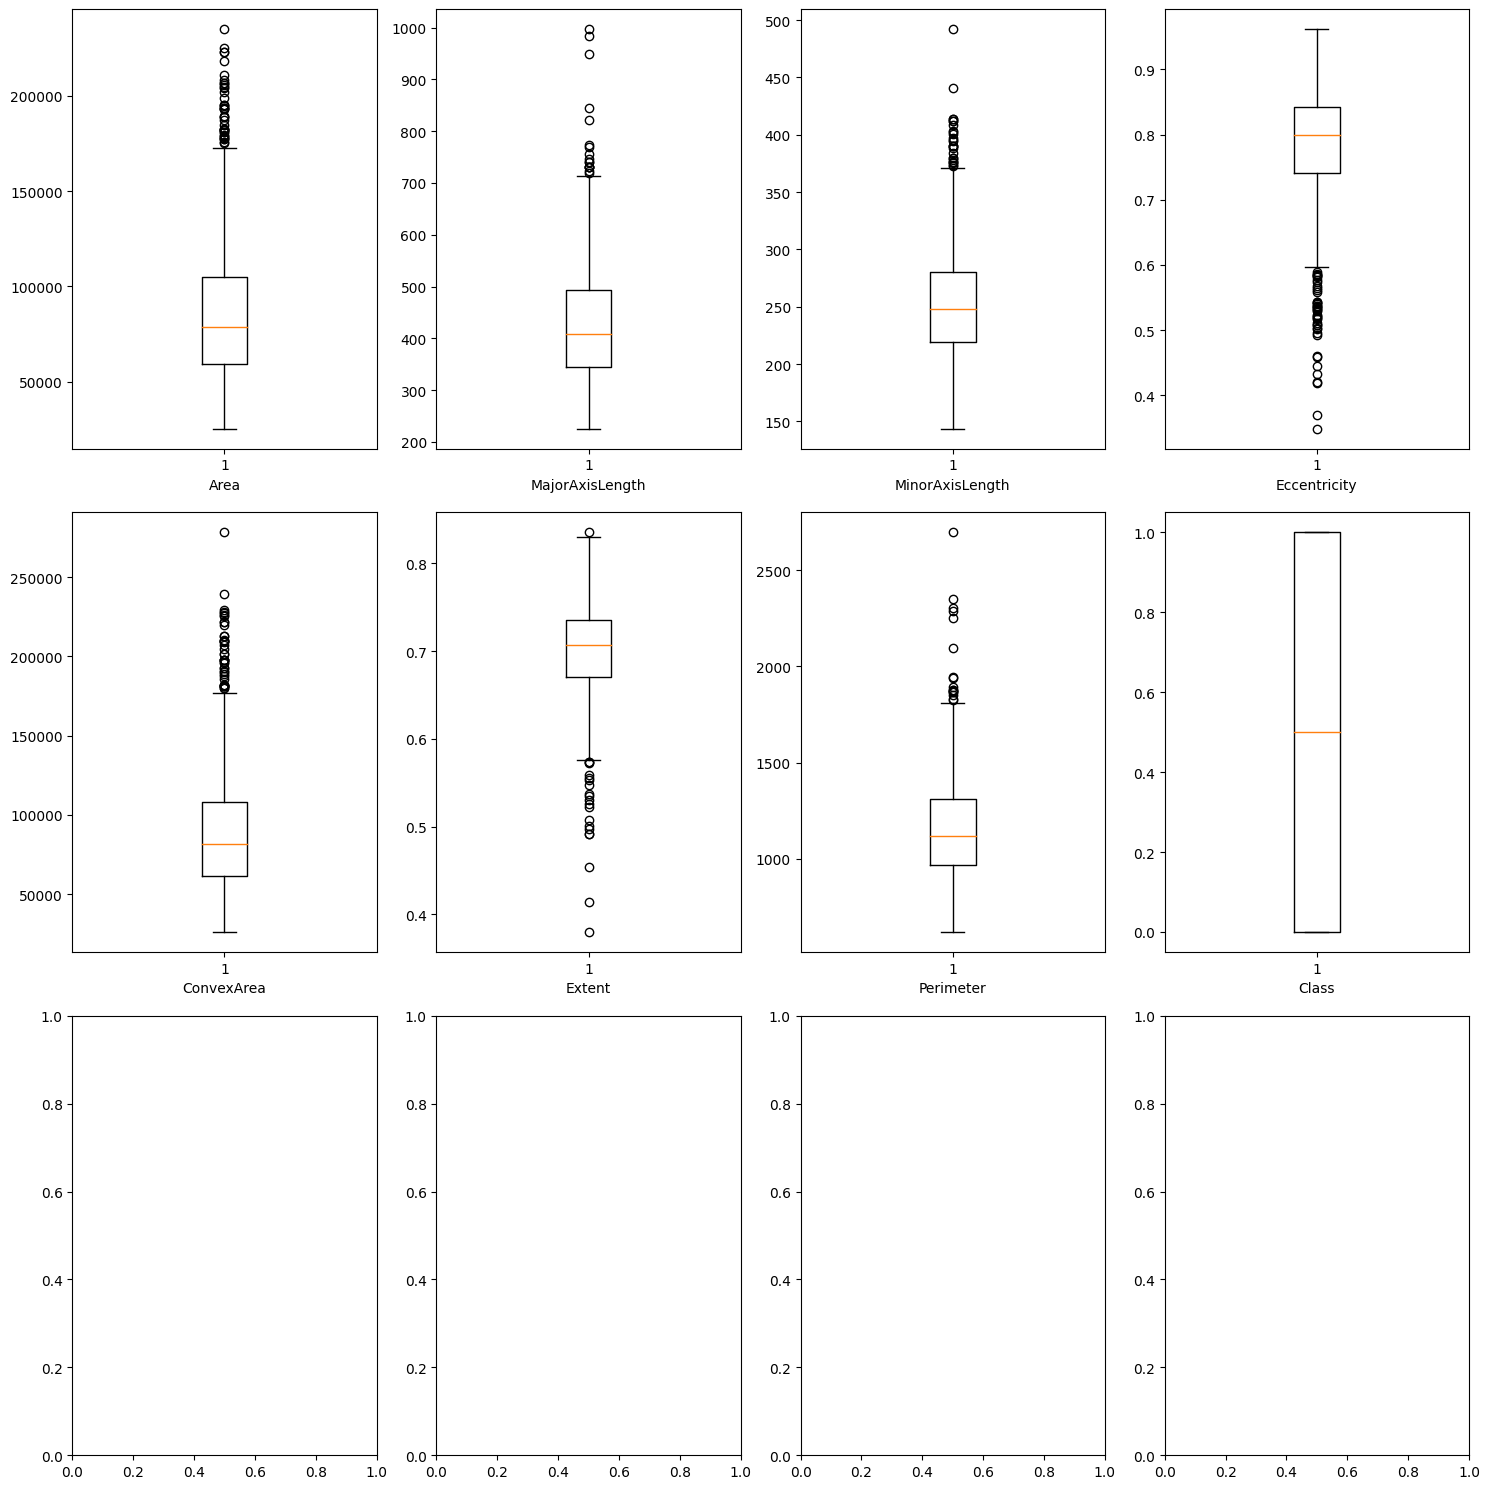

In [293]:
size=len(liste_float_int)
fig, axes = plt.subplots((size//4)+1, 4, figsize=(15, 15))
axes=axes.flatten()
for i, cols in enumerate(liste_float_int):
  axes[i].boxplot(df[cols])
  axes[i].set_xlabel(cols)
plt.tight_layout()
plt.show()
resume=summary(resume,"EDA","Box plot sur les champs numériques","Box plot sur les champs numériques")

28


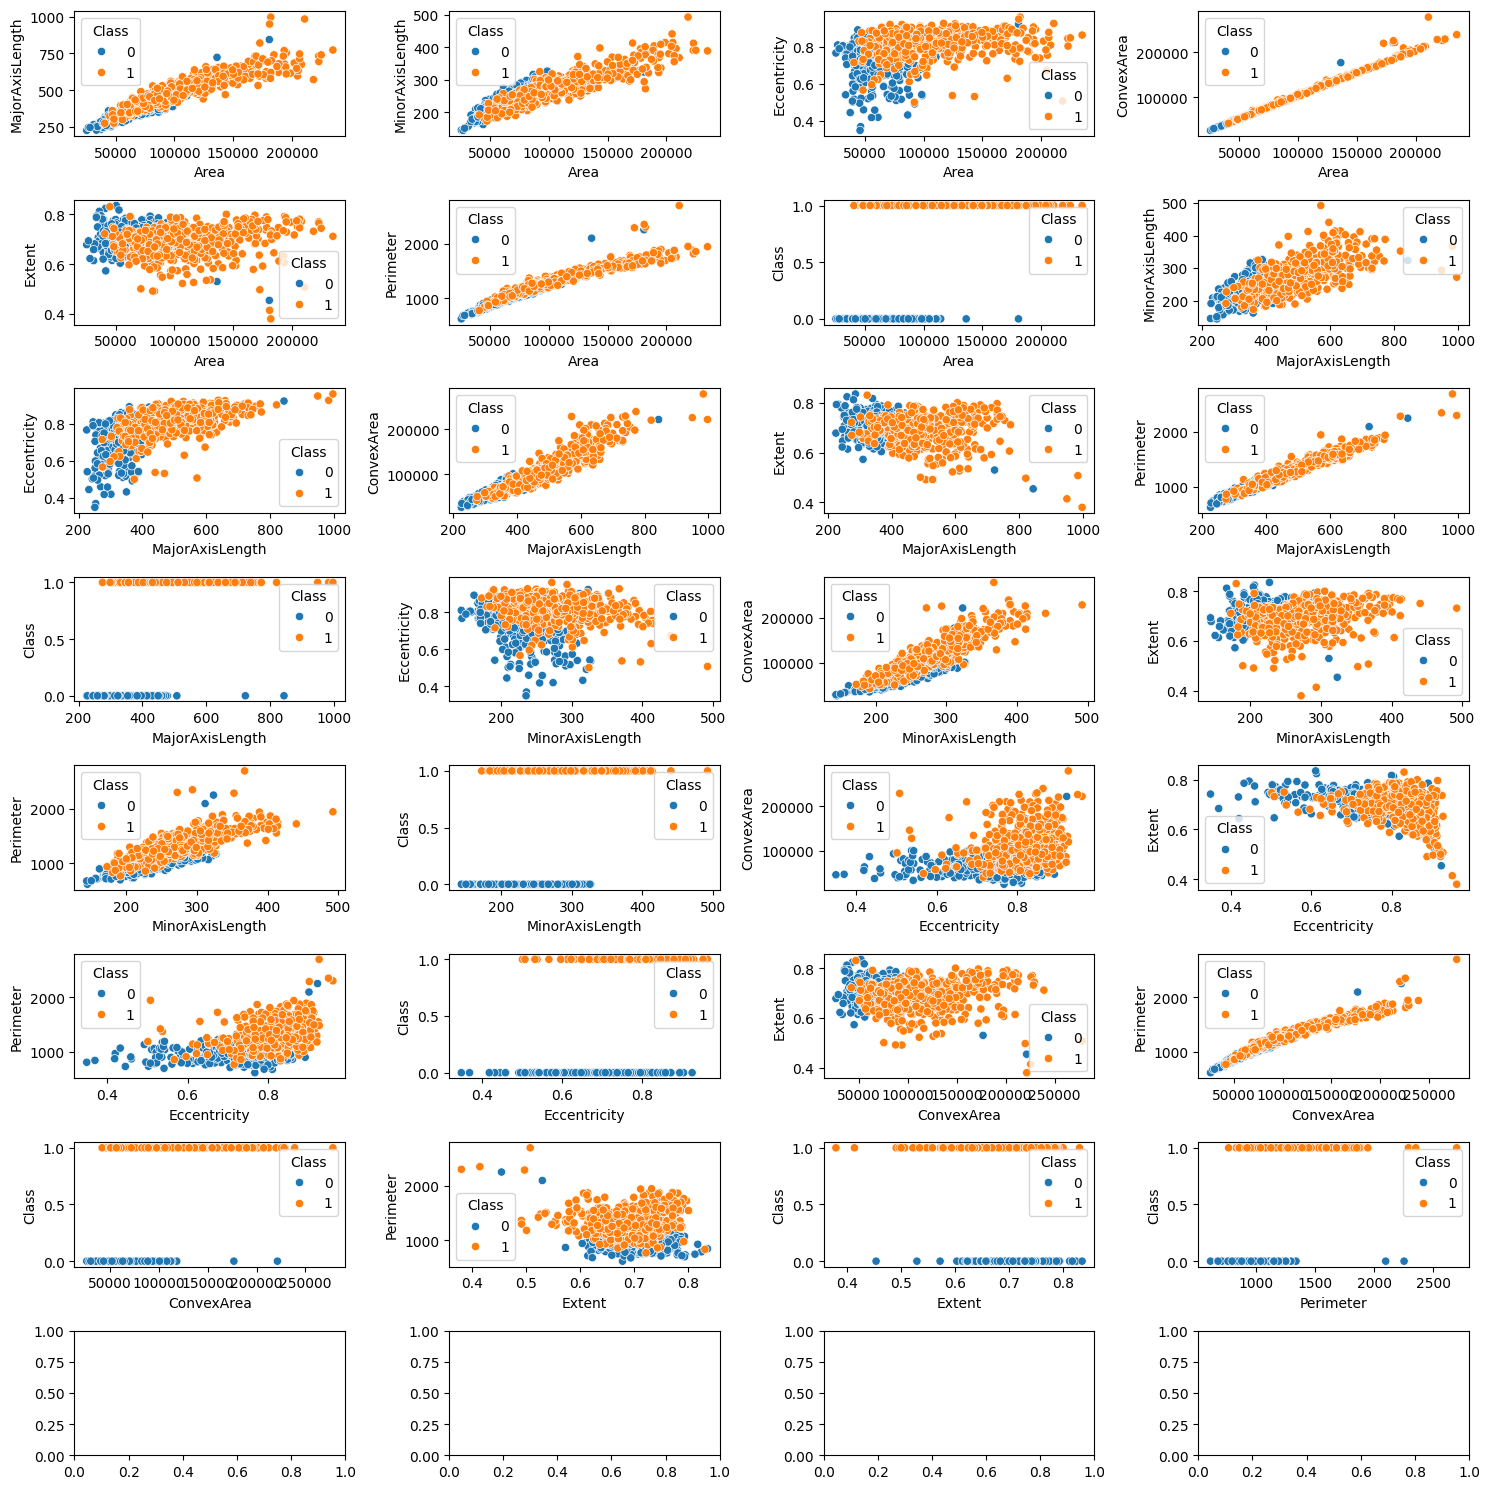

In [294]:
size=len(list(combinations(liste_float_int,2)))
print(size)
fig, axes = plt.subplots(max(size//4,1)+1, 4, figsize=(15, 15))
axes=axes.flatten()
for i, cols in enumerate(combinations(liste_float_int,2)):
  sns.scatterplot(data=df,x=cols[0],y=cols[1],hue=cible,ax=axes[i])
  #axes[i].scatter(df[cols[0]], df[cols[1]])
  #axes[i].set_xlabel(cols[0])
  #axes[i].set_ylabel(cols[1])
plt.tight_layout()
plt.show()
resume=summary(resume,"EDA","sns Scatter plot avec hue sur la cible","sns Scatter plot avec hue sur la cible")

**Analyse VIF**

**Vérifications des valeurs abérantes**

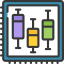

In [295]:
outliers=""
for col in liste_float_int:
  if df[col].nunique()>=5:
    inf=df[col].quantile(0.25)-1.5*iqr(df[col])
    sup=df[col].quantile(0.75)+1.5*iqr(df[col])
    df_outliers=df[(df[col]<inf) | (df[col]>sup)][col]
    outliers=outliers + "la colonne " + col + " contient "+ str(len(df_outliers))+ " outliers pour un iqr de " + str(iqr(df[col])) +'\n'
    df[col]=np.where(df[col]>sup,df[col].mean(),df[col])
    df[col]=np.where(df[col]<inf,df[col].mean(),df[col])
    print(df_outliers)
    print("*"*100)
resume=summary(resume,"EDA","valeurs aberantes avant correction",f"valeurs abérantes :"+"\n" + str(outliers))

85     180898
467    184784
469    195383
475    177264
479    189637
487    210923
506    182160
507    208264
515    188651
516    202118
522    177206
541    193032
552    204864
560    178334
574    193558
580    206720
581    205497
590    177916
616    199015
622    193818
650    194864
657    192815
666    178692
668    206689
671    182823
678    182788
708    222915
711    204226
751    182122
768    175247
769    195281
771    175946
777    181926
804    223075
812    235047
836    181126
855    189069
866    225043
870    179668
880    218459
893    187391
Name: Area, dtype: int64
****************************************************************************************************
85     843.956653
290    722.853917
467    740.108710
469    755.012914
487    984.045491
506    997.291941
509    719.505878
540    730.760960
574    769.425149
634    731.561876
657    731.440292
668    746.145341
694    820.724022
708    731.559406
812    772.956877
836    949.662672
866    740.0

In [296]:
outliers=""
for col in liste_float_int:
  if df[col].nunique()>=5:
    inf=df[col].quantile(0.25)-1.5*iqr(df[col])
    sup=df[col].quantile(0.75)+1.5*iqr(df[col])
    df[col]=np.where(df[col]>sup,sup,df[col])
    df[col]=np.where(df[col]<inf,inf,df[col])
    df_outliers=df[(df[col]<inf) | (df[col]>sup)][col]

    if len(df_outliers)>0:
      outliers= outliers + "la colonne " + col + " contient encore  "+ str(len(df_outliers))+ " outliers pour un iqr de " + str(iqr(df[col])) +'\n'
      print(df_outliers)
      print("*"*100)

resume=summary(resume,"EDA","valeurs aberantes après correction",f"valeurs abérantes :"+"\n" + str(outliers))

**Transformation des données catégorielles**

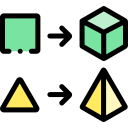

In [297]:
features=df.drop(cible, axis=1)
features=pd.get_dummies(features,columns=liste_cat,dtype=float, drop_first=True)
resume=summary(resume,"Data Preprocessing","transformation des données catégorielles",f"méthode utilisée: pd.get_dummies(...)")

**Division du Dataset**

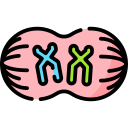

In [298]:
features=features.values
targets=df[cible].values
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=fraction, random_state=seed)
resume=summary(resume,"Modelisation",f"Division en données {features.shape} d'entrainement et de test \n",f"proportion de test {X_test.shape} :{fraction}"+"\n"\
               + f"valeur de reproductibilité :{seed}")

**Standardisation / Normalisation des données**

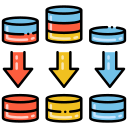

In [299]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
resume=summary(resume,"Data Preprocessing","Standardisation/Normalisation des données",f"méthode utilisée [sklearn]: StandardScaler(...)")

**Initialisation du modèle**

In [300]:
logreg=LogisticRegression(solver='lbfgs', max_iter=100)
resume=summary(resume,"Modelisation","Instanciation du modèle",f"LogisticRegression(...)")

Entrainement du modèle

In [301]:
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred_proba=logreg.predict_proba(X_test)[:,1]
resume=summary(resume,"Modelisation","Entrainement du modèle",f"LogisticRegression(...)")

Validation des hypothèses

In [302]:
hypotheses="xxx"
resume=summary(resume,"Validation des hypothèses","Validation des hypothèses",hypotheses)

Evaluation du modèle

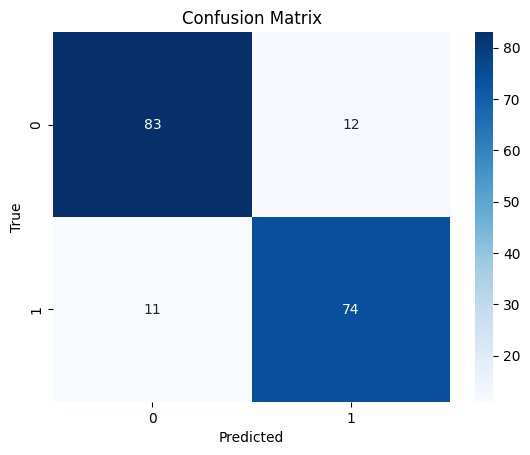

In [303]:
cm = confusion_matrix(y_test, y_pred)
# Afficher la matrice de confusion avec seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
resume=summary(resume,"Evaluation","Matrice de confusion",cm)

In [304]:
resume=summary(resume,"Evaluation","accuracy",str(round(roc_auc,3)))

In [305]:
resume=summary(resume,"Evaluation","Recall",str(round(roc_auc,3)))
resume=summary(resume,"Evaluation","F1-Score",str(round(roc_auc,3)))

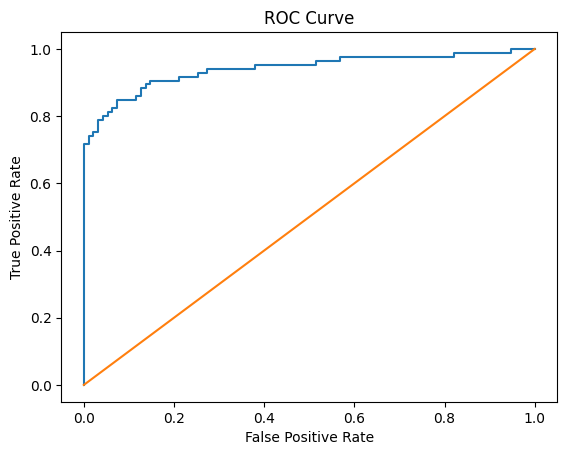

0.9404334365325077


In [306]:
#print(y_pred)
#print(y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot(np.arange(0,1.1,0.1), np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc = auc(fpr, tpr)
print(roc_auc)
resume=summary(resume,"Evaluation","Precision du modèle",str(round(roc_auc,3)))

Interpretation du résultat

In [307]:
resume=summary(resume,"Inteprétation du résultat","Interprétation :",f" notre modèle a un score de {str(round(roc_auc,3))} ce qui signifie que...")

In [308]:
print_summary(resume)

****************************************************************************************************
================================RESULTATS: analyses et Modélisation=================================
****************************************************************************************************
+-----+---------------------------+---------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------+
|   1 | Section                   | libelle                                                 | information                                                                                                          |
+=====+===========================+=========================================================+======================================================================================================================+
|   2 | Dataset                   | Path                  